In [1]:
#!/usr/bin/env python3
#！_*_ coding:utf-8 _*_

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import shap
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from pylab import mpl
import seaborn as sns 
import random 
import os 
import gc
from tqdm import tqdm 
from sklearn.preprocessing import label_binarize

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']    # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False   

import warnings
warnings.filterwarnings('ignore')

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(123)

print('import finish')

import finish


### 1、读取数据

In [2]:
# 文件路径 

DATA_PATH_ONS = '../data/ons-model-based-income-estimates-msoa (4).xls'
DATA_PATH_HOUSING = '../data/housing-density-borough (2).csv'
DATA_PATH_LOCAL = '../data/local_authority_traffic (5).csv'

# 读取数据 
data_ons_2011_12 = pd.read_excel(DATA_PATH_ONS,sheet_name='2011-12 (weekly income)')
data_ons_2013_14 = pd.read_excel(DATA_PATH_ONS,sheet_name='2013-14 (weekly income)')
data_ons_2015_16 = pd.read_excel(DATA_PATH_ONS,sheet_name='2015-16 (annual income)')

data_housing = pd.read_csv(DATA_PATH_HOUSING)
data_local = pd.read_csv(DATA_PATH_LOCAL)

In [3]:
data_ons_2011_12

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Total weekly income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),...,Lower confidence limit (£).1,Confidence interval (£).1,Net income before housing costs (£),Upper confidence limit (£).2,Lower confidence limit (£).2,Confidence interval (£).2,Net income after housing costs (£),Upper confidence limit (£).3,Lower confidence limit (£).3,Confidence interval (£).3
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,630,690,570,120,...,440,80,480,530,440,90,450,510,390,120
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,730,800,660,140,...,500,90,510,560,460,100,460,530,400,120
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,690,760,630,130,...,480,90,500,550,450,100,470,540,420,130
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,540,600,500,100,...,390,70,420,470,390,80,380,440,340,100
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,500,550,460,90,...,370,70,420,460,380,80,370,420,320,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000362,Newport 016,W06000022,Newport,W92000004,Wales,810,900,730,180,...,550,120,570,630,510,120,520,600,450,150
7197,W02000363,Newport 017,W06000022,Newport,W92000004,Wales,540,600,480,120,...,390,80,440,490,400,90,400,460,350,110
7198,W02000364,Newport 018,W06000022,Newport,W92000004,Wales,440,480,390,90,...,330,70,340,380,310,70,250,290,220,70
7199,W02000365,Newport 019,W06000022,Newport,W92000004,Wales,550,610,500,110,...,400,80,410,460,370,80,340,390,300,100


In [4]:
data_ons_2013_14

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Total weekly income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),...,Lower confidence limit (£).1,Confidence interval (£).1,Net income before housing costs (£),Upper confidence limit (£).2,Lower confidence limit (£).2,Confidence interval (£).2,Net income after housing costs (£),Upper confidence limit (£).3,Lower confidence limit (£).3,Confidence interval (£).3
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,700,790,610,180,...,480,90,510,550,470,80,480,550,430,120
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,730,830,640,190,...,520,100,500,540,460,80,480,540,420,120
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,730,830,640,190,...,510,100,550,600,510,90,500,570,440,130
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,600,690,530,160,...,440,80,450,490,420,70,420,470,370,100
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,540,620,470,140,...,370,70,430,460,390,70,390,440,340,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000362,Newport 016,W06000022,Newport,W92000004,Wales,720,820,630,190,...,510,100,510,560,470,90,470,540,420,120
7197,W02000363,Newport 017,W06000022,Newport,W92000004,Wales,570,650,500,150,...,410,80,420,460,390,70,400,460,360,100
7198,W02000364,Newport 018,W06000022,Newport,W92000004,Wales,460,520,400,130,...,330,80,330,360,300,60,260,300,230,70
7199,W02000365,Newport 019,W06000022,Newport,W92000004,Wales,540,610,470,140,...,390,70,390,420,360,60,340,390,300,90


In [5]:
data_ons_2015_16

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Total annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),...,Lower confidence limit (£).1,Confidence interval (£).1,Net income before housing costs (£),Upper confidence limit (£).2,Lower confidence limit (£).2,Confidence interval (£).2,Net income after housing costs (£),Upper confidence limit (£).3,Lower confidence limit (£).3,Confidence interval (£).3
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,35900,45200,28500,16700,...,22100,11700,27600,33300,22800,10400,25600,31000,21200,9800
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,42500,53600,33700,19900,...,23900,13100,28600,34500,23700,10800,27500,33200,22700,10500
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,38000,47700,30200,17600,...,22800,12300,28200,34100,23400,10700,26700,32300,22100,10200
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,33500,42200,26700,15500,...,21600,11200,25500,30800,21100,9700,22400,27100,18500,8700
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,31700,39800,25200,14600,...,20700,10800,25100,30200,20800,9500,20900,25300,17200,8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000362,Newport 016,W06000022,Newport,W92000004,Wales,38800,48800,30900,17900,...,24300,12600,27700,33400,23000,10500,26000,31400,21500,9800
7197,W02000363,Newport 017,W06000022,Newport,W92000004,Wales,32700,41200,26000,15100,...,20200,10400,25000,30200,20800,9400,22700,27400,18800,8600
7198,W02000364,Newport 018,W06000022,Newport,W92000004,Wales,25900,32800,20300,12500,...,17500,9300,20200,24400,16600,7800,16400,19800,13600,6300
7199,W02000365,Newport 019,W06000022,Newport,W92000004,Wales,32800,41400,26000,15400,...,20400,10700,24200,29200,20000,9200,19300,23400,16000,7400


In [6]:
# 数据拼接 

data_2011_2016 = pd.concat([data_ons_2011_12,data_ons_2013_14,data_ons_2015_16],axis = 0)
data_2011_2016

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Total weekly income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),...,Net income before housing costs (£),Upper confidence limit (£).2,Lower confidence limit (£).2,Confidence interval (£).2,Net income after housing costs (£),Upper confidence limit (£).3,Lower confidence limit (£).3,Confidence interval (£).3,Total annual income (£),Net annual income (£)
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,630.0,690,570,120,...,480,530,440,90,450,510,390,120,NaN,NaN
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,730.0,800,660,140,...,510,560,460,100,460,530,400,120,NaN,NaN
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,690.0,760,630,130,...,500,550,450,100,470,540,420,130,NaN,NaN
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,540.0,600,500,100,...,420,470,390,80,380,440,340,100,NaN,NaN
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,500.0,550,460,90,...,420,460,380,80,370,420,320,100,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000362,Newport 016,W06000022,Newport,W92000004,Wales,NaN,48800,30900,17900,...,27700,33400,23000,10500,26000,31400,21500,9800,38800.0,29900.0
7197,W02000363,Newport 017,W06000022,Newport,W92000004,Wales,NaN,41200,26000,15100,...,25000,30200,20800,9400,22700,27400,18800,8600,32700.0,24900.0
7198,W02000364,Newport 018,W06000022,Newport,W92000004,Wales,NaN,32800,20300,12500,...,20200,24400,16600,7800,16400,19800,13600,6300,25900.0,21700.0
7199,W02000365,Newport 019,W06000022,Newport,W92000004,Wales,NaN,41400,26000,15400,...,24200,29200,20000,9200,19300,23400,16000,7400,32800.0,25200.0


In [7]:
data_housing

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1
...,...,...,...,...,...,...,...,...,...,...
1867,E13000002,Outer London,2046,GLA Population Projections,6573194,125423.6,126675.6,52.4,1254.2,5240.8
1868,E13000002,Outer London,2047,GLA Population Projections,6598789,125423.6,126675.6,52.6,1254.2,5261.2
1869,E13000002,Outer London,2048,GLA Population Projections,6622921,125423.6,126675.6,52.8,1254.2,5280.4
1870,E13000002,Outer London,2049,GLA Population Projections,6647527,125423.6,126675.6,53.0,1254.2,5300.1


In [8]:
data_local

,id,local_authority_name,ons_code,region_id,local_authority_id,year,link_length_km,link_length_miles,cars_and_taxis,all_motor_vehicles
0,321,Hartlepool,E06000001,11,132,1993,385.351,239.45,287107346.8,3.422533e+08
1,822,Hartlepool,E06000001,11,132,1993,385.351,239.45,287107346.8,3.422533e+08
2,823,Middlesbrough,E06000002,11,170,1993,493.212,306.47,604140895.9,7.048122e+08
3,824,Redcar and Cleveland,E06000003,11,171,1993,675.168,419.53,446328948.9,5.228484e+08
4,825,Stockton-on-Tees,E06000004,11,163,1993,845.721,525.51,668148077.7,8.000379e+08
...,...,...,...,...,...,...,...,...,...,...
5730,6551,Torfaen,W06000020,4,25,2020,482.089,299.56,284507214.7,3.601668e+08
5731,6552,Monmouthshire,W06000021,4,13,2020,1626.520,1010.67,529506425.6,7.323918e+08
5732,6553,Newport,W06000022,4,6,2020,757.706,470.82,743499944.2,1.000086e+09
5733,6554,Powys,W06000023,4,14,2020,5357.025,3328.70,586677064.9,8.497405e+08


In [9]:
# cars_and_taxis，
# Population，
# Population_per_square_kilometre，
# Total_Area_Hectares，
# Total weekly income (£)， 
# Net income before housing costs (£)， 
# Net income after housing costs (£)

In [10]:
data_housing['cars_and_taxis'] = data_local['cars_and_taxis'] 
data_housing['Total weekly income (£)'] = data_ons_2011_12['Total weekly income (£)']
data_housing['Net income before housing costs (£)'] = data_ons_2011_12['Net income before housing costs (£)']
data_housing['Net income after housing costs (£)'] = data_ons_2011_12['Net income after housing costs (£)']

# 标签 
data_housing['all_motor_vehicles'] = data_local['all_motor_vehicles']

In [11]:
data_local.isnull().sum()

id                      0
local_authority_name    0
ons_code                0
region_id               0
local_authority_id      0
year                    0
link_length_km          0
link_length_miles       0
cars_and_taxis          0
all_motor_vehicles      0
dtype: int64

In [12]:
data_housing

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2,287107346.8,630,480,450,3.422533e+08
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3,287107346.8,730,510,460,3.422533e+08
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1,604140895.9,690,500,470,7.048122e+08
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9,446328948.9,540,420,380,5.228484e+08
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1,668148077.7,500,420,370,8.000379e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,E13000002,Outer London,2046,GLA Population Projections,6573194,125423.6,126675.6,52.4,1254.2,5240.8,856437997.9,630,470,410,1.055627e+09
1868,E13000002,Outer London,2047,GLA Population Projections,6598789,125423.6,126675.6,52.6,1254.2,5261.2,425162959.2,710,490,460,5.072792e+08
1869,E13000002,Outer London,2048,GLA Population Projections,6622921,125423.6,126675.6,52.8,1254.2,5280.4,356124062.4,540,400,360,4.169537e+08
1870,E13000002,Outer London,2049,GLA Population Projections,6647527,125423.6,126675.6,53.0,1254.2,5300.1,784174777.9,450,390,320,1.001045e+09


In [13]:
# 拷贝一份

df = data_housing.copy()
df_rf = data_housing.copy()
df_mlp = data_housing.copy()
df 

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2,287107346.8,630,480,450,3.422533e+08
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3,287107346.8,730,510,460,3.422533e+08
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1,604140895.9,690,500,470,7.048122e+08
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9,446328948.9,540,420,380,5.228484e+08
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1,668148077.7,500,420,370,8.000379e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,E13000002,Outer London,2046,GLA Population Projections,6573194,125423.6,126675.6,52.4,1254.2,5240.8,856437997.9,630,470,410,1.055627e+09
1868,E13000002,Outer London,2047,GLA Population Projections,6598789,125423.6,126675.6,52.6,1254.2,5261.2,425162959.2,710,490,460,5.072792e+08
1869,E13000002,Outer London,2048,GLA Population Projections,6622921,125423.6,126675.6,52.8,1254.2,5280.4,356124062.4,540,400,360,4.169537e+08
1870,E13000002,Outer London,2049,GLA Population Projections,6647527,125423.6,126675.6,53.0,1254.2,5300.1,784174777.9,450,390,320,1.001045e+09


### 2、绘图 

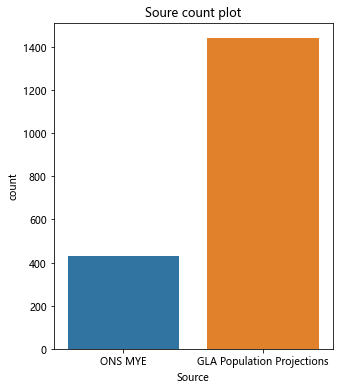

In [14]:
# soource plot 

plt.figure(figsize=(5,6))
plt.title('Soure count plot')
sns.countplot(df['Source'])
plt.show()

In [15]:
print('各字段缺失值占比：')
print(df.isnull().sum().sort_values(ascending=False) / df.shape[0])

各字段缺失值占比：
Code                                   0.0
Name                                   0.0
Year                                   0.0
Source                                 0.0
Population                             0.0
Inland_Area _Hectares                  0.0
Total_Area_Hectares                    0.0
Population_per_hectare                 0.0
Square_Kilometres                      0.0
Population_per_square_kilometre        0.0
cars_and_taxis                         0.0
Total weekly income (£)                0.0
Net income before housing costs (£)    0.0
Net income after housing costs (£)     0.0
all_motor_vehicles                     0.0
dtype: float64


Population


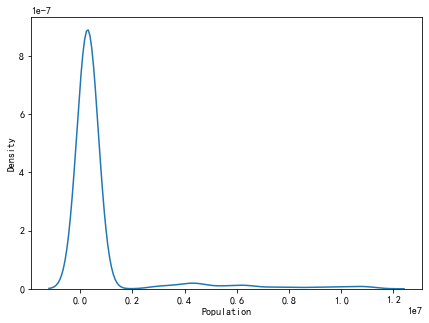

Inland_Area _Hectares


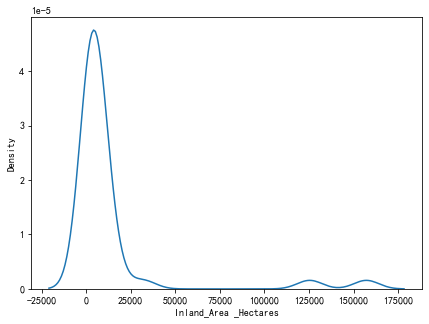

Total_Area_Hectares


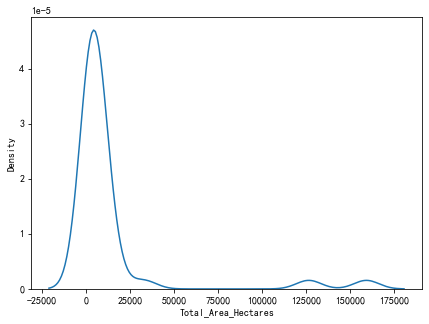

Population_per_hectare


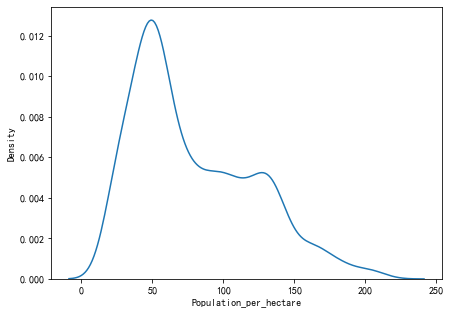

Square_Kilometres


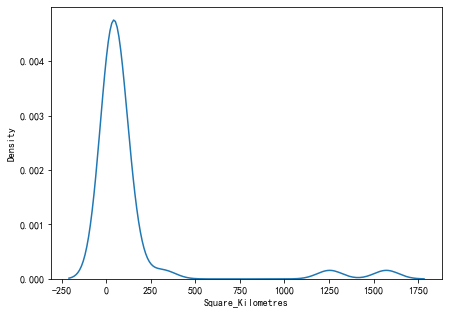

Population_per_square_kilometre


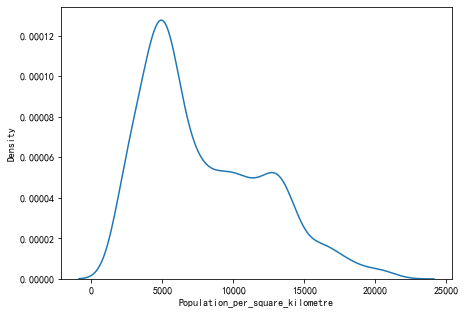

cars_and_taxis


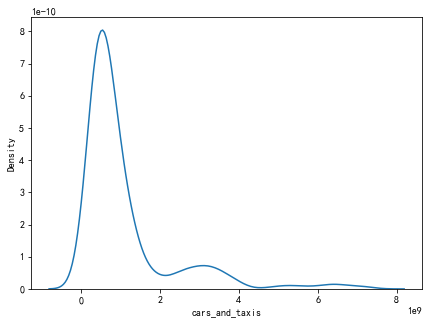

Total weekly income (£)


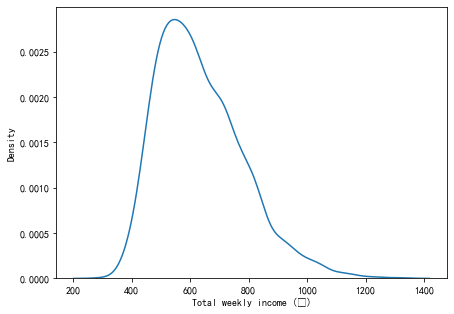

Net income before housing costs (£)


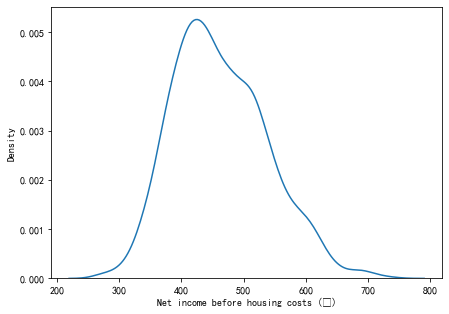

Net income after housing costs (£)


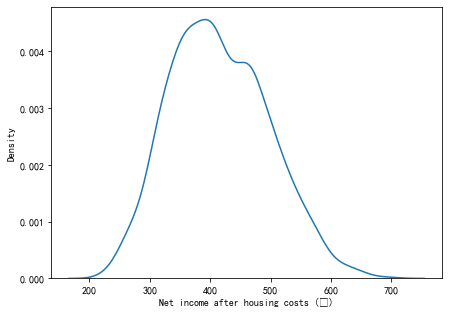

all_motor_vehicles


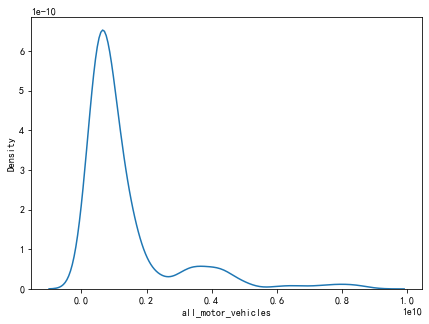

In [16]:
# 设置字体 

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

cols = [col for col in df.columns if col not in ['Code','Year','Name','Source']]


# 每个字段的核密度曲线图 
for col in cols:
    print(col)
    plt.figure(figsize=(7,5))
    sns.kdeplot(df[col])
    plt.show()

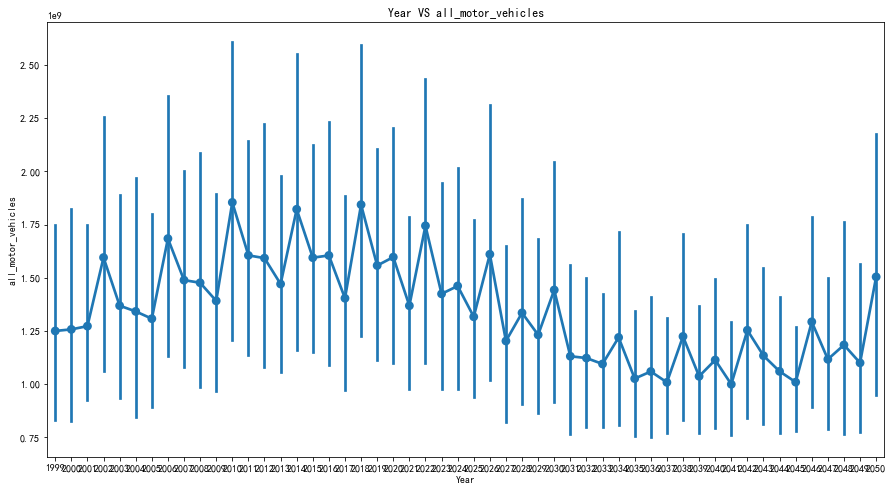

In [17]:
# Year VS all_motor_vehicles

plt.figure(figsize=(15,8))
plt.title('Year VS all_motor_vehicles')
sns.pointplot(x='Year', y='all_motor_vehicles', data=df)
plt.show()

In [18]:
# # Source 
# # ONS MYE ,GLA Population Projections

# plt.figure(figsize=(8,5))
# sns.lineplot(x='Year', y='all_motor_vehicles', data=df, hue='Source')
# plt.xticks(list(range(50)))
# plt.show()


plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif': ['simhei', 'Arial']})

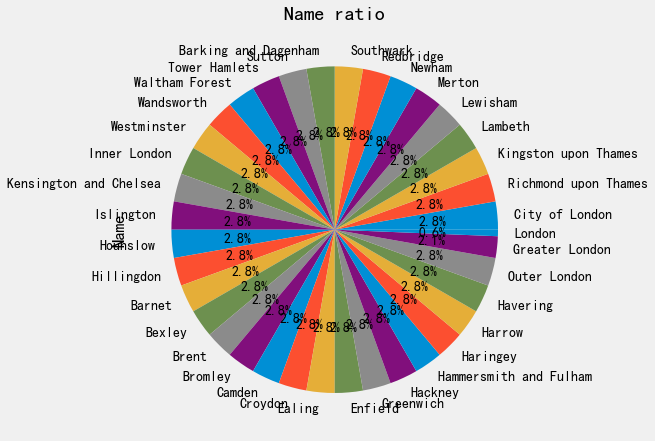

In [19]:
# Name plot 

plt.figure(figsize=[9, 7])
plt.title('Name ratio')
df['Name'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

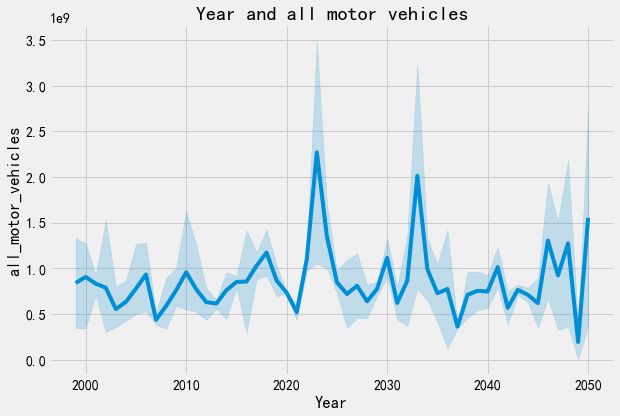

In [20]:
## all_motor_vehicles plot

plt.figure(figsize=(9, 6)) 
plt.title('Year and all motor vehicles')
sns.lineplot(data = df[:120],x = df['Year'][:120],y = df['all_motor_vehicles'][:120])
plt.show()

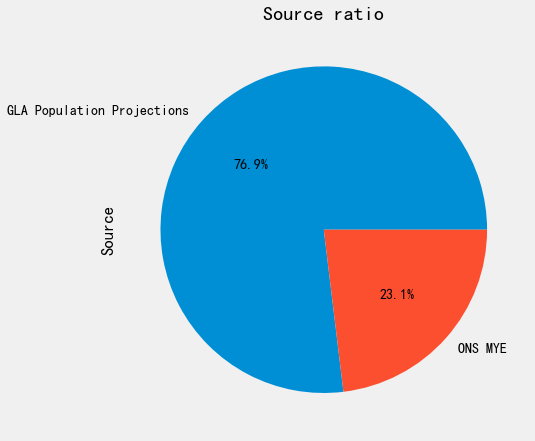

In [21]:
# Source ratio plot 

plt.figure(figsize=[9, 7])
plt.title('Source ratio')
df['Source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

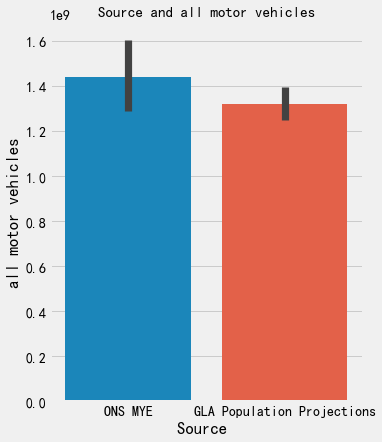

In [22]:
# Source  VS  all_motor_vehicles plot 

f, ax3 = plt.subplots(figsize=(5, 6.5))
sns.barplot(x='Source', y='all_motor_vehicles', data=df, ax=ax3)
ax3.set_title('Source and all motor vehicles', fontsize=15)
ax3.set_xlabel('Source ')
ax3.set_ylabel('all motor vehicles')
plt.show()

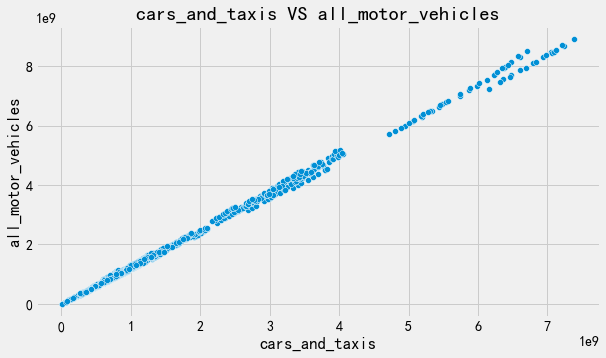

In [23]:
# cars_and_taxis VS  all_motor_vehicles plot 

plt.figure(figsize=(9, 5)) 
plt.title('cars_and_taxis VS all_motor_vehicles')
sns.scatterplot(data = df,x = df['cars_and_taxis'],y = df['all_motor_vehicles'])
plt.show()

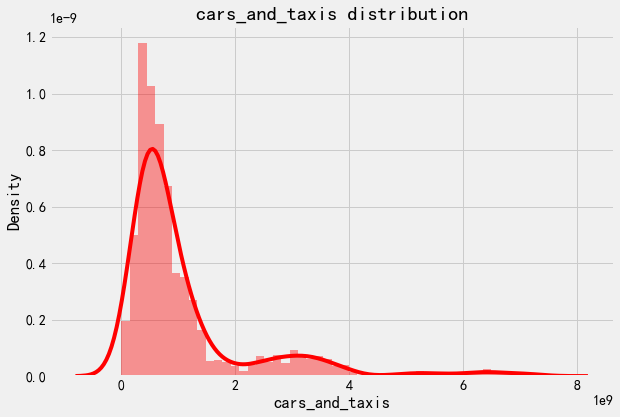

In [24]:
# cars_and_taxis 频率直方图

plt.figure(figsize=(9, 6))  
plt.title("cars_and_taxis distribution")
# sns.scatterplot(x='YearBuilt', y='SalePrice', data=train) 
sns.distplot(df.cars_and_taxis,color = 'r')  # 写法二
plt.show()

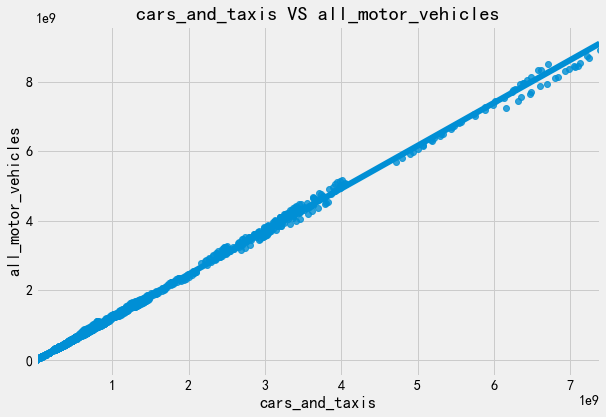

In [25]:
# cars_and_taxis VS all_motor_vehicles

plt.figure(figsize=(9, 6))
plt.title("cars_and_taxis VS all_motor_vehicles")
sns.regplot(df['cars_and_taxis'],df['all_motor_vehicles'])
plt.show()

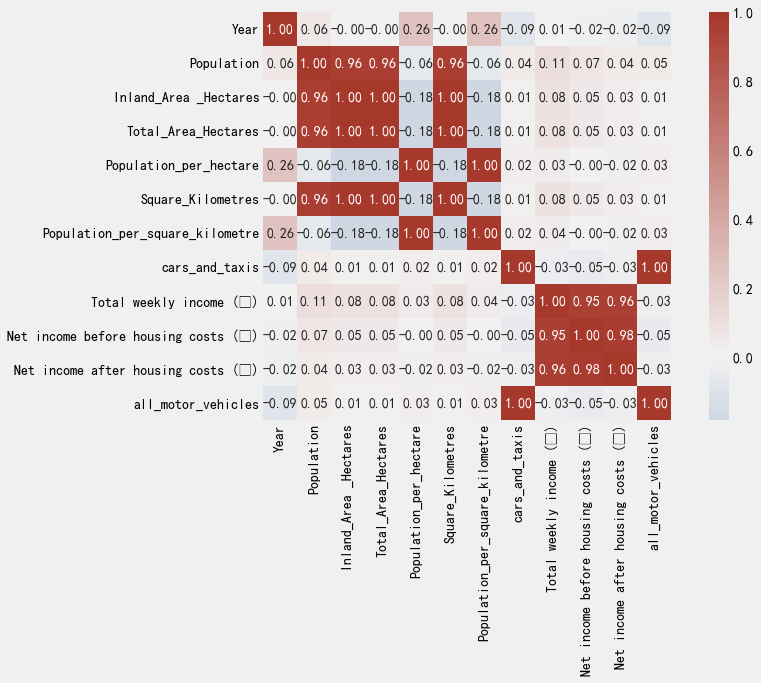

In [26]:
# 绘制相关性矩阵，查看各字段之间的相关系数。数值越大说明越相关.

matrix = df.corr()
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(12, 7))
sns.heatmap(matrix, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.show()

### 3、建立模型 

In [27]:
# 标签编码  

LE = LabelEncoder()
df['Name'] = LE.fit_transform(df['Name'])
df['Source'] = LE.fit_transform(df['Source'])
df['Code'] = LE.fit_transform(df['Code'])
df 

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles
0,0,6,1999,1,6581,290.4,314.9,22.7,2.9,2266.2,287107346.8,630,480,450,3.422533e+08
1,0,6,2000,1,7014,290.4,314.9,24.2,2.9,2415.3,287107346.8,730,510,460,3.422533e+08
2,0,6,2001,1,7359,290.4,314.9,25.3,2.9,2534.1,604140895.9,690,500,470,7.048122e+08
3,0,6,2002,1,7280,290.4,314.9,25.1,2.9,2506.9,446328948.9,540,420,380,5.228484e+08
4,0,6,2003,1,7115,290.4,314.9,24.5,2.9,2450.1,668148077.7,500,420,370,8.000379e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,35,28,2046,0,6573194,125423.6,126675.6,52.4,1254.2,5240.8,856437997.9,630,470,410,1.055627e+09
1868,35,28,2047,0,6598789,125423.6,126675.6,52.6,1254.2,5261.2,425162959.2,710,490,460,5.072792e+08
1869,35,28,2048,0,6622921,125423.6,126675.6,52.8,1254.2,5280.4,356124062.4,540,400,360,4.169537e+08
1870,35,28,2049,0,6647527,125423.6,126675.6,53.0,1254.2,5300.1,784174777.9,450,390,320,1.001045e+09


In [28]:
df.columns

Index(['Code', 'Name', 'Year', 'Source', 'Population', 'Inland_Area _Hectares',
       'Total_Area_Hectares', 'Population_per_hectare', 'Square_Kilometres',
       'Population_per_square_kilometre', 'cars_and_taxis',
       'Total weekly income (£)', 'Net income before housing costs (£)',
       'Net income after housing costs (£)', 'all_motor_vehicles'],
      dtype='object')

In [29]:
# log变换 已做好
def logs(all,colunms):
    for col in colunms:
        all[col] = np.log(all[col]+1)
    return all


# 平方变换 已做好
def squ(res,ls):
    m = res.shape[1]
    for i in ls:
        res = res.assign(newcol = pd.Series((res[i]*res[i]).values))
        res.columns.values[m] = i + '_squ'
        m+=1 
    return res 

log_features = ['Inland_Area _Hectares']

squ_features = ['Population_per_hectare']

df = squ(df,squ_features)
df = logs(df,log_features)
df

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles,Population_per_hectare_squ
0,0,6,1999,1,6581,5.674697,314.9,22.7,2.9,2266.2,287107346.8,630,480,450,3.422533e+08,515.29
1,0,6,2000,1,7014,5.674697,314.9,24.2,2.9,2415.3,287107346.8,730,510,460,3.422533e+08,585.64
2,0,6,2001,1,7359,5.674697,314.9,25.3,2.9,2534.1,604140895.9,690,500,470,7.048122e+08,640.09
3,0,6,2002,1,7280,5.674697,314.9,25.1,2.9,2506.9,446328948.9,540,420,380,5.228484e+08,630.01
4,0,6,2003,1,7115,5.674697,314.9,24.5,2.9,2450.1,668148077.7,500,420,370,8.000379e+08,600.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,35,28,2046,0,6573194,11.739460,126675.6,52.4,1254.2,5240.8,856437997.9,630,470,410,1.055627e+09,2745.76
1868,35,28,2047,0,6598789,11.739460,126675.6,52.6,1254.2,5261.2,425162959.2,710,490,460,5.072792e+08,2766.76
1869,35,28,2048,0,6622921,11.739460,126675.6,52.8,1254.2,5280.4,356124062.4,540,400,360,4.169537e+08,2787.84
1870,35,28,2049,0,6647527,11.739460,126675.6,53.0,1254.2,5300.1,784174777.9,450,390,320,1.001045e+09,2809.00


In [30]:
# from sklearn.model_selection import KFold

# folds = KFold(n_splits=5,shuffle=True,random_state=2022)
# for col in df.columns:
#     colname = col+'_kfold'
#     for fold_,(trn_idx,val_idx) in enumerate(folds.split(df,df)):
#         tmp = df.iloc[trn_idx]
#         order_label = tmp.groupby([col])['all_motor_vehicles'].mean()
#         df[colname] = df[col].map(order_label)
# #     order_label = df.groupby([col])['all_motor_vehicles'].mean()
# #     test[colname] = test[col].map(order_label)
# df 

In [31]:
# 数据归一化 

features = [fea for fea in df.columns if fea not in ['all_motor_vehicles']]
scaler = MinMaxScaler(feature_range=(0, 1))

for f in features:
    df[f] = scaler.fit_transform(df[f].values.reshape(-1,1))
df 

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles,Population_per_hectare_squ
0,0.0,0.166667,0.000000,1.0,0.000000,0.000000,0.000000,0.016037,0.000000,0.015623,0.038759,0.323529,0.446809,0.479167,3.422533e+08,0.002918
1,0.0,0.166667,0.019608,1.0,0.000039,0.000000,0.000000,0.023797,0.000000,0.023337,0.038759,0.421569,0.510638,0.500000,3.422533e+08,0.004483
2,0.0,0.166667,0.039216,1.0,0.000069,0.000000,0.000000,0.029488,0.000000,0.029483,0.081696,0.382353,0.489362,0.520833,7.048122e+08,0.005695
3,0.0,0.166667,0.058824,1.0,0.000062,0.000000,0.000000,0.028453,0.000000,0.028075,0.060323,0.235294,0.319149,0.333333,5.228484e+08,0.005470
4,0.0,0.166667,0.078431,1.0,0.000048,0.000000,0.000000,0.025349,0.000000,0.025137,0.090365,0.196078,0.319149,0.312500,8.000379e+08,0.004808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,1.0,0.777778,0.921569,0.0,0.586218,0.964087,0.793944,0.169684,0.797413,0.169508,0.115866,0.323529,0.425532,0.395833,1.055627e+09,0.052547
1868,1.0,0.777778,0.941176,0.0,0.588502,0.964087,0.793944,0.170719,0.797413,0.170563,0.057457,0.401961,0.468085,0.500000,5.072792e+08,0.053015
1869,1.0,0.777778,0.960784,0.0,0.590657,0.964087,0.793944,0.171754,0.797413,0.171556,0.048107,0.235294,0.276596,0.291667,4.169537e+08,0.053484
1870,1.0,0.777778,0.980392,0.0,0.592853,0.964087,0.793944,0.172788,0.797413,0.172575,0.106079,0.147059,0.255319,0.208333,1.001045e+09,0.053955


In [32]:
df = df.fillna(df.mean())
df 

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles,Population_per_hectare_squ
0,0.0,0.166667,0.000000,1.0,0.000000,0.000000,0.000000,0.016037,0.000000,0.015623,0.038759,0.323529,0.446809,0.479167,3.422533e+08,0.002918
1,0.0,0.166667,0.019608,1.0,0.000039,0.000000,0.000000,0.023797,0.000000,0.023337,0.038759,0.421569,0.510638,0.500000,3.422533e+08,0.004483
2,0.0,0.166667,0.039216,1.0,0.000069,0.000000,0.000000,0.029488,0.000000,0.029483,0.081696,0.382353,0.489362,0.520833,7.048122e+08,0.005695
3,0.0,0.166667,0.058824,1.0,0.000062,0.000000,0.000000,0.028453,0.000000,0.028075,0.060323,0.235294,0.319149,0.333333,5.228484e+08,0.005470
4,0.0,0.166667,0.078431,1.0,0.000048,0.000000,0.000000,0.025349,0.000000,0.025137,0.090365,0.196078,0.319149,0.312500,8.000379e+08,0.004808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,1.0,0.777778,0.921569,0.0,0.586218,0.964087,0.793944,0.169684,0.797413,0.169508,0.115866,0.323529,0.425532,0.395833,1.055627e+09,0.052547
1868,1.0,0.777778,0.941176,0.0,0.588502,0.964087,0.793944,0.170719,0.797413,0.170563,0.057457,0.401961,0.468085,0.500000,5.072792e+08,0.053015
1869,1.0,0.777778,0.960784,0.0,0.590657,0.964087,0.793944,0.171754,0.797413,0.171556,0.048107,0.235294,0.276596,0.291667,4.169537e+08,0.053484
1870,1.0,0.777778,0.980392,0.0,0.592853,0.964087,0.793944,0.172788,0.797413,0.172575,0.106079,0.147059,0.255319,0.208333,1.001045e+09,0.053955


In [33]:
# 划分数据集 

data = df.drop(columns=[
                        'all_motor_vehicles'
                       ])

label = df['all_motor_vehicles']

test_size = 0.2
random_state = 2022 
x_trian,x_test,y_train,y_test = train_test_split(data,
                                                 label,
                                                 test_size = test_size,
                                                 shuffle = False,
                                                 random_state = random_state
                                                )


In [34]:
# 线性回归

from sklearn.linear_model import LinearRegression 
LR = LinearRegression(fit_intercept=True,
                      normalize=False,
                      copy_X=True,
                      n_jobs=-2,
                     )

LR = LR.fit(x_trian,y_train)

In [35]:
# 测试模型 

pred = LR.predict(x_test)
r2 = r2_score(pred,y_test)
print('LinearRegression r2:',round(r2,5))


LinearRegression r2: 0.99362


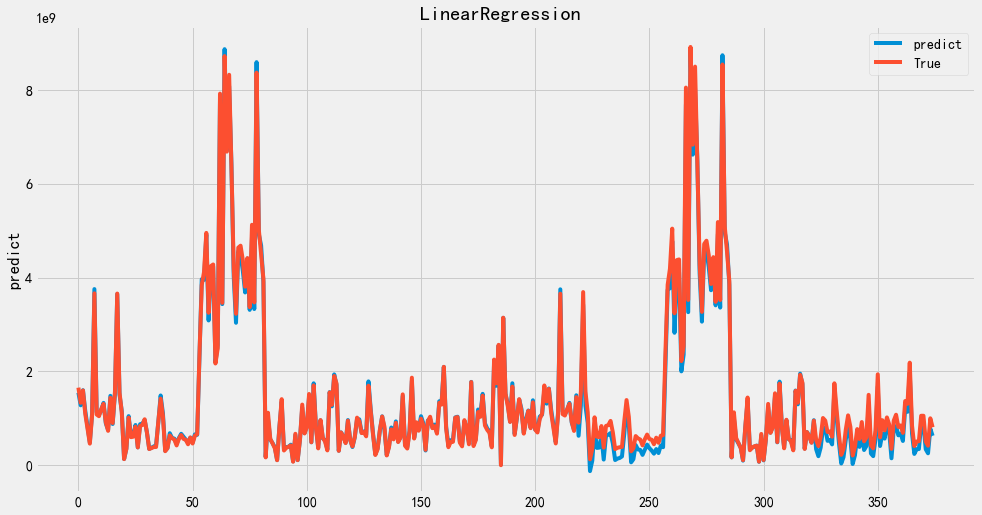

In [36]:
# 结果对比  

x_test['predict'] = pred 
x_test['True'] = y_test

plt.figure(figsize=(15,8)) 
plt.title('LinearRegression ')
sns.lineplot(data = x_test,x = range(375),y = x_test['predict'],label = 'predict')
sns.lineplot(data = x_test,x = range(375),y = x_test['True'],label = 'True')
plt.legend(loc='best')
plt.show()

In [37]:
df_rf

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2,287107346.8,630,480,450,3.422533e+08
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3,287107346.8,730,510,460,3.422533e+08
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1,604140895.9,690,500,470,7.048122e+08
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9,446328948.9,540,420,380,5.228484e+08
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1,668148077.7,500,420,370,8.000379e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,E13000002,Outer London,2046,GLA Population Projections,6573194,125423.6,126675.6,52.4,1254.2,5240.8,856437997.9,630,470,410,1.055627e+09
1868,E13000002,Outer London,2047,GLA Population Projections,6598789,125423.6,126675.6,52.6,1254.2,5261.2,425162959.2,710,490,460,5.072792e+08
1869,E13000002,Outer London,2048,GLA Population Projections,6622921,125423.6,126675.6,52.8,1254.2,5280.4,356124062.4,540,400,360,4.169537e+08
1870,E13000002,Outer London,2049,GLA Population Projections,6647527,125423.6,126675.6,53.0,1254.2,5300.1,784174777.9,450,390,320,1.001045e+09


In [38]:
# 标签编码  

LE = LabelEncoder()
df_rf['Name'] = LE.fit_transform(df_rf['Name'])
df_rf['Source'] = LE.fit_transform(df_rf['Source'])
df_rf['Code'] = LE.fit_transform(df_rf['Code'])
df_rf 

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles
0,0,6,1999,1,6581,290.4,314.9,22.7,2.9,2266.2,287107346.8,630,480,450,3.422533e+08
1,0,6,2000,1,7014,290.4,314.9,24.2,2.9,2415.3,287107346.8,730,510,460,3.422533e+08
2,0,6,2001,1,7359,290.4,314.9,25.3,2.9,2534.1,604140895.9,690,500,470,7.048122e+08
3,0,6,2002,1,7280,290.4,314.9,25.1,2.9,2506.9,446328948.9,540,420,380,5.228484e+08
4,0,6,2003,1,7115,290.4,314.9,24.5,2.9,2450.1,668148077.7,500,420,370,8.000379e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,35,28,2046,0,6573194,125423.6,126675.6,52.4,1254.2,5240.8,856437997.9,630,470,410,1.055627e+09
1868,35,28,2047,0,6598789,125423.6,126675.6,52.6,1254.2,5261.2,425162959.2,710,490,460,5.072792e+08
1869,35,28,2048,0,6622921,125423.6,126675.6,52.8,1254.2,5280.4,356124062.4,540,400,360,4.169537e+08
1870,35,28,2049,0,6647527,125423.6,126675.6,53.0,1254.2,5300.1,784174777.9,450,390,320,1.001045e+09


In [39]:
# log变换 已做好
def logs(all,colunms):
    for col in colunms:
        all[col] = np.log(all[col]+1)
    return all


# 平方变换 已做好
def squ(res,ls):
    m = res.shape[1]
    for i in ls:
        res = res.assign(newcol = pd.Series((res[i]*res[i]).values))
        res.columns.values[m] = i + '_squ'
        m+=1 
    return res 

log_features = ['Inland_Area _Hectares']

squ_features = ['Population_per_hectare',]

df_rf = squ(df_rf,squ_features)
df_rf = logs(df_rf,log_features)
df_rf

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles,Population_per_hectare_squ
0,0,6,1999,1,6581,5.674697,314.9,22.7,2.9,2266.2,287107346.8,630,480,450,3.422533e+08,515.29
1,0,6,2000,1,7014,5.674697,314.9,24.2,2.9,2415.3,287107346.8,730,510,460,3.422533e+08,585.64
2,0,6,2001,1,7359,5.674697,314.9,25.3,2.9,2534.1,604140895.9,690,500,470,7.048122e+08,640.09
3,0,6,2002,1,7280,5.674697,314.9,25.1,2.9,2506.9,446328948.9,540,420,380,5.228484e+08,630.01
4,0,6,2003,1,7115,5.674697,314.9,24.5,2.9,2450.1,668148077.7,500,420,370,8.000379e+08,600.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,35,28,2046,0,6573194,11.739460,126675.6,52.4,1254.2,5240.8,856437997.9,630,470,410,1.055627e+09,2745.76
1868,35,28,2047,0,6598789,11.739460,126675.6,52.6,1254.2,5261.2,425162959.2,710,490,460,5.072792e+08,2766.76
1869,35,28,2048,0,6622921,11.739460,126675.6,52.8,1254.2,5280.4,356124062.4,540,400,360,4.169537e+08,2787.84
1870,35,28,2049,0,6647527,11.739460,126675.6,53.0,1254.2,5300.1,784174777.9,450,390,320,1.001045e+09,2809.00


In [40]:
# 划分数据集 

data = df_rf.drop(columns=[
                        'all_motor_vehicles'
                           ])

label = df_rf['all_motor_vehicles']

test_size = 0.2
random_state = 2022 
x_trian,x_test,y_train,y_test = train_test_split(data,
                                                 label,
                                                 test_size = test_size,
                                                 shuffle = False,
                                                 random_state = random_state
                                                )


In [41]:
## 随机森林 

randomforest = RandomForestRegressor(n_estimators=500,
                                        max_depth=10,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        min_weight_fraction_leaf=0.0,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        bootstrap=True,
                                        oob_score=False,
                                        n_jobs=None,
                                        random_state=None,
                                        verbose=0,
                                        warm_start=False,
                                        ccp_alpha=0.0,
                                        max_samples=None,
                                     )

randomforest = randomforest.fit(x_trian,y_train)



In [42]:
# 测试模型 

# x_test = x_test.drop(columns=['predict','True'])
pred = randomforest.predict(x_test)
r2 = r2_score(pred,y_test)
print('RandomForest r2:',round(r2,5))


RandomForest r2: 0.99806


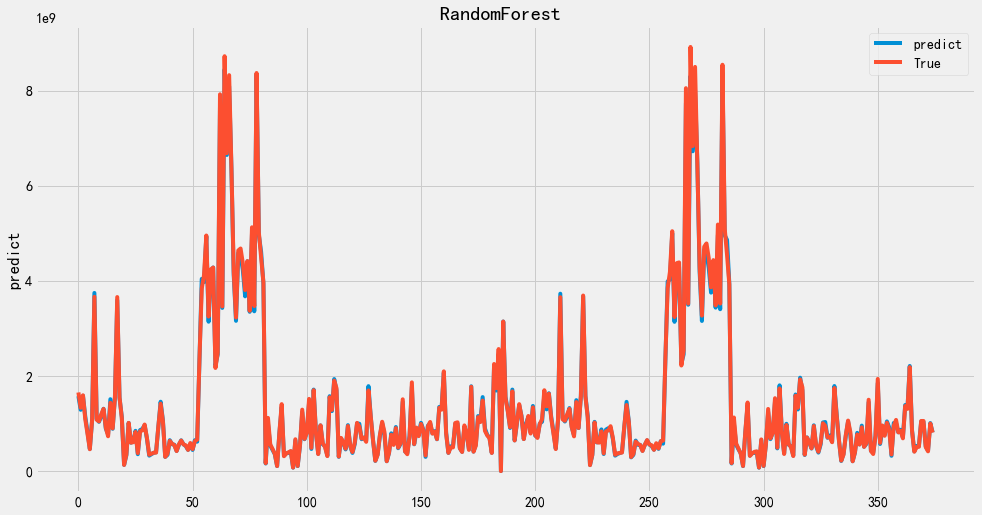

In [43]:
# 结果对比  

x_test['predict'] = pred 
x_test['True'] = y_test

plt.figure(figsize=(15,8)) 
plt.title('RandomForest ')
sns.lineplot(data = x_test,x = range(375),y = x_test['predict'],label = 'predict')
sns.lineplot(data = x_test,x = range(375),y = x_test['True'],label = 'True')
plt.legend(loc='best')
plt.show()

In [44]:
df_mlp

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2,287107346.8,630,480,450,3.422533e+08
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3,287107346.8,730,510,460,3.422533e+08
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1,604140895.9,690,500,470,7.048122e+08
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9,446328948.9,540,420,380,5.228484e+08
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1,668148077.7,500,420,370,8.000379e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,E13000002,Outer London,2046,GLA Population Projections,6573194,125423.6,126675.6,52.4,1254.2,5240.8,856437997.9,630,470,410,1.055627e+09
1868,E13000002,Outer London,2047,GLA Population Projections,6598789,125423.6,126675.6,52.6,1254.2,5261.2,425162959.2,710,490,460,5.072792e+08
1869,E13000002,Outer London,2048,GLA Population Projections,6622921,125423.6,126675.6,52.8,1254.2,5280.4,356124062.4,540,400,360,4.169537e+08
1870,E13000002,Outer London,2049,GLA Population Projections,6647527,125423.6,126675.6,53.0,1254.2,5300.1,784174777.9,450,390,320,1.001045e+09


In [45]:
# 标签编码  

LE = LabelEncoder()
df_mlp['Name'] = LE.fit_transform(df_mlp['Name'])
df_mlp['Source'] = LE.fit_transform(df_mlp['Source'])
df_mlp['Code'] = LE.fit_transform(df_mlp['Code'])
df_mlp 

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles
0,0,6,1999,1,6581,290.4,314.9,22.7,2.9,2266.2,287107346.8,630,480,450,3.422533e+08
1,0,6,2000,1,7014,290.4,314.9,24.2,2.9,2415.3,287107346.8,730,510,460,3.422533e+08
2,0,6,2001,1,7359,290.4,314.9,25.3,2.9,2534.1,604140895.9,690,500,470,7.048122e+08
3,0,6,2002,1,7280,290.4,314.9,25.1,2.9,2506.9,446328948.9,540,420,380,5.228484e+08
4,0,6,2003,1,7115,290.4,314.9,24.5,2.9,2450.1,668148077.7,500,420,370,8.000379e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,35,28,2046,0,6573194,125423.6,126675.6,52.4,1254.2,5240.8,856437997.9,630,470,410,1.055627e+09
1868,35,28,2047,0,6598789,125423.6,126675.6,52.6,1254.2,5261.2,425162959.2,710,490,460,5.072792e+08
1869,35,28,2048,0,6622921,125423.6,126675.6,52.8,1254.2,5280.4,356124062.4,540,400,360,4.169537e+08
1870,35,28,2049,0,6647527,125423.6,126675.6,53.0,1254.2,5300.1,784174777.9,450,390,320,1.001045e+09


In [46]:
# log变换 已做好
def logs(all,colunms):
    for col in colunms:
        all[col] = np.log(all[col]+1)
    return all


# 平方变换 已做好
def squ(res,ls):
    m = res.shape[1]
    for i in ls:
        res = res.assign(newcol = pd.Series((res[i]*res[i]).values))
        res.columns.values[m] = i + '_squ'
        m+=1 
    return res 

log_features = ['Inland_Area _Hectares']

squ_features = ['Population_per_hectare',]

df_mlp = squ(df_mlp,squ_features)
df_mlp = logs(df_mlp,log_features)
df_mlp

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre,cars_and_taxis,Total weekly income (£),Net income before housing costs (£),Net income after housing costs (£),all_motor_vehicles,Population_per_hectare_squ
0,0,6,1999,1,6581,5.674697,314.9,22.7,2.9,2266.2,287107346.8,630,480,450,3.422533e+08,515.29
1,0,6,2000,1,7014,5.674697,314.9,24.2,2.9,2415.3,287107346.8,730,510,460,3.422533e+08,585.64
2,0,6,2001,1,7359,5.674697,314.9,25.3,2.9,2534.1,604140895.9,690,500,470,7.048122e+08,640.09
3,0,6,2002,1,7280,5.674697,314.9,25.1,2.9,2506.9,446328948.9,540,420,380,5.228484e+08,630.01
4,0,6,2003,1,7115,5.674697,314.9,24.5,2.9,2450.1,668148077.7,500,420,370,8.000379e+08,600.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,35,28,2046,0,6573194,11.739460,126675.6,52.4,1254.2,5240.8,856437997.9,630,470,410,1.055627e+09,2745.76
1868,35,28,2047,0,6598789,11.739460,126675.6,52.6,1254.2,5261.2,425162959.2,710,490,460,5.072792e+08,2766.76
1869,35,28,2048,0,6622921,11.739460,126675.6,52.8,1254.2,5280.4,356124062.4,540,400,360,4.169537e+08,2787.84
1870,35,28,2049,0,6647527,11.739460,126675.6,53.0,1254.2,5300.1,784174777.9,450,390,320,1.001045e+09,2809.00


In [47]:
# 划分数据集 

data = df_mlp.drop(columns=[
                        'all_motor_vehicles'
                           ])

label = df_mlp['all_motor_vehicles']

test_size = 0.2
random_state = 2022 
x_trian,x_test,y_train,y_test = train_test_split(data,
                                                 label,
                                                 test_size = test_size,
                                                 shuffle = False,
                                                 random_state = random_state
                                                )


In [48]:
# MLP 

from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(
                    hidden_layer_sizes=(100,50),
                    activation='relu',
                    solver='adam',
                    alpha=0.001,
                    batch_size='auto',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    power_t=0.5,
                    max_iter=500,
                    shuffle=True,
                    random_state=None,
                    tol=0.0001,
                    verbose=False,
                    warm_start=False,
                    momentum=0.9,
                    nesterovs_momentum=True,
                    early_stopping=False,
                    validation_fraction=0.1,
                    beta_1=0.9,
                    beta_2=0.999,
                    epsilon=1e-08,
                    n_iter_no_change=10,
                    max_fun=15000,
                    )

    
MLP.fit(x_trian,y_train)


MLPRegressor(alpha=0.001, hidden_layer_sizes=(100, 50), max_iter=500)

In [49]:
# 测试模型 

# x_test = x_test.drop(columns=['predict','True'])
pred = MLP.predict(x_test)

In [50]:
# 计算R2 
r2 = r2_score(pred,y_test)
print('MLP r2:',round(r2,5))

MLP r2: 0.99844


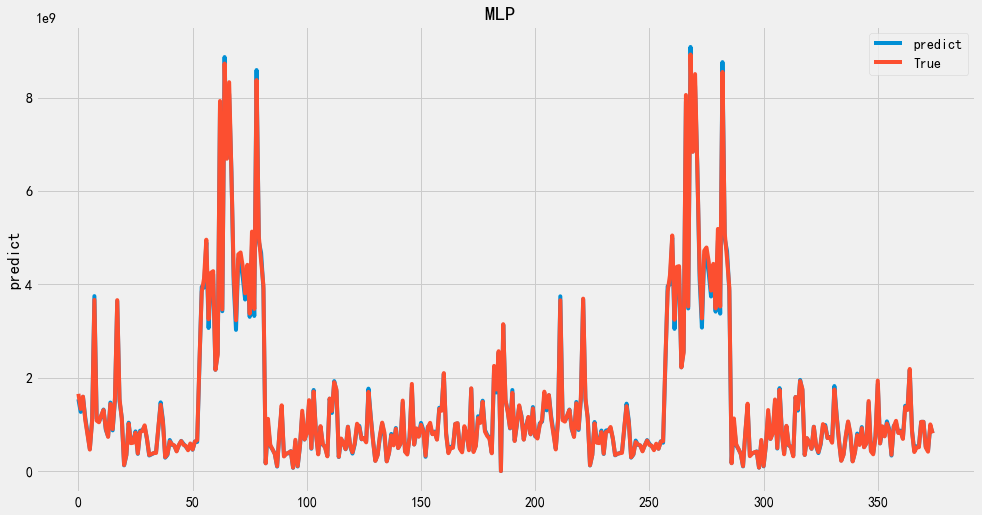

In [51]:
# 结果对比  

x_test['predict'] = pred 
x_test['True'] = y_test

plt.figure(figsize=(15,8)) 
plt.title('MLP ')
sns.lineplot(data = x_test,x = range(375),y = x_test['predict'],label = 'predict')
sns.lineplot(data = x_test,x = range(375),y = x_test['True'],label = 'True')
plt.legend(loc='best')
plt.show()